# Pip install and imports
At the start of project 
```bash
$ pip install numpy jupyterlab pandas scikit-learn matplotlib
```

`sklear` used for train_test_split data and for label encoding only 

`Matplotlib` used for ploting graphs

`numpy` used for data manipulation 

`pandas` used for the dataframe 

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


# Loading dataframe

In [2]:
df_original = pd.read_csv('taxi_trip_pricing.csv')
df = df_original.copy()
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# Data cleaning 
## Replace NaN with mean
In `TripDistance_km`, `Base_Fare`, `Per_Km_Rate`, `Per_Minute_Rate`, `Trip_Duration_Minutes` and `Trip_Price` features, find the mean values and replace the NaN with the mean value

In [3]:
mean_Trip_Distance_km = df['Trip_Distance_km'].mean()
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(mean_Trip_Distance_km)

mean_Base_Fare = df['Base_Fare'].mean()
df['Base_Fare'] = df['Base_Fare'].fillna(mean_Base_Fare)

mean_Per_Km_Rate = df['Per_Km_Rate'].mean()
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(mean_Per_Km_Rate)

mean_Per_Minute_Rate = df['Per_Minute_Rate'].mean()
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(mean_Per_Minute_Rate)

mean_Trip_Duration_Minutes = df['Trip_Duration_Minutes'].mean()
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(mean_Trip_Duration_Minutes)

mean_Trip_Price = df['Trip_Price'].mean()
df['Trip_Price'] = df['Trip_Price'].fillna(mean_Trip_Price)

# print(f'Mean Trip_Distance_km: {mean_Trip_Distance_km}')
# print(f'Mean Base_Fare: {mean_Base_Fare}')
# print(f'Mean Per_Km_Rate: {mean_Per_Km_Rate}')
# print(f'Mean Per_Minute_Rate: {mean_Per_Minute_Rate}')
# print(f'Mean Trip_Duration_Minutes: {mean_Trip_Duration_Minutes}')
# print(f'Mean Trip_Price: {mean_Trip_Price}')


## Replace NaN with unknown
In the `Time_of_Day`, `Day_of_Week`, `Traffic_Conditions` and `Weather` replace with `Unknown` because dataset has too many NaN's to drop them

In [4]:
df['Time_of_Day'] = df['Time_of_Day'].fillna('Unknown')
df['Day_of_Week'] = df['Day_of_Week'].fillna('Unknown')
df['Traffic_Conditions'] = df['Traffic_Conditions'].fillna('Unknown')
df['Weather'] = df['Weather'].fillna('Unknown')

## Replace NaN with most common (mode imputation)
In the `Passenger_Count` feature we use mode imputation to replace NaN with most frequencly occuring value 

In [5]:
mode_count = df['Passenger_Count'].mode()[0]
df['Passenger_Count'] = df['Passenger_Count'].fillna(mode_count)
# print(mode_count


## Replace Outliers

We use the formula for outliers to replace them with mean and make a better dataset for the model

Standard deviation formula:  
$$
\sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}}
$$

Z Value Formula:
$$
Z = \frac{X - \mu}{\sigma}
$$

In [6]:
numrical_cols = [
    'Trip_Distance_km',
    'Base_Fare',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes',
    'Trip_Price',
]

for col in numrical_cols:
    sigma = df[col].std()
    mu = df[col].mean()

    for i in range(len(df[col])):
        Z = (df[col].iloc[i] - mu) / sigma

        if Z > 3 or Z < -3:
            df.loc[i, col] = mu

## Label Encoding
The laber encoding will turn the features with string to features with numeric values, we use sklearn library to do label encoding. 

In [7]:
categorical_cols = [
    'Time_of_Day',
    'Day_of_Week',
    'Traffic_Conditions',
    'Weather'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## Feature Engineering
Making new better feasture for our model by combinging two other features 

In [8]:
df['duration_per_minute_rate'] = df['Trip_Duration_Minutes'] * df['Per_Minute_Rate']
df['distance_per_km_rate'] = df['Trip_Distance_km'] * df['Per_Km_Rate']

## Divide features and label
`X` variable will hold all the features

`y` variable will hold all the labels (target) we only have `Trip_Price` label 

Display the dataset after all the processing

In [9]:
X = df.drop(columns=['Trip_Price'])
y = df['Trip_Price']

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,duration_per_minute_rate,distance_per_km_rate
0,19.350000,2,1,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400,17.2224,15.480000
1,47.590000,0,1,1.0,0,0,3.502989,0.62,0.43,40.57,56.874773,17.4451,29.505800
2,36.870000,1,2,1.0,0,0,2.700000,1.21,0.15,37.27,52.903200,5.5905,44.612700
3,30.330000,1,1,4.0,1,3,3.480000,0.51,0.15,116.81,36.469800,17.5215,15.468300
4,27.070547,1,1,3.0,0,0,2.930000,0.63,0.32,22.64,15.618000,7.2448,17.054445


# Creating Model
## Correlation
Before creating model we check correlation between features and label, this way we can easily choose features the best without running each feature through the model and wasting our time. 

Inputing all the features and target in the function it will show us the best correlating values 

The results that we use are only above 0.5, the values below 0 are really bad 

we used the formula: 
$$r = \frac{\sum (X - \bar{X})(Y - \bar{Y})}{\sqrt{\sum (X - \bar{X})^2} \sqrt{\sum (Y - \bar{Y})^2}}$$

In [10]:
# X is all features
# Y is only target label
# Find correlation between X and y
def correlation(X: pd.DataFrame, y):
    correlation_results = []
    y_mean = y.mean()
    for feature in X:
        x_mean = X[f'{feature}'].mean()
        i = 0
        top_part = 0
        sqrt_left = 0
        sqrt_right = 0
        for x in X[f"{feature}"]:
            top_part += (x-x_mean)*(y[i]-y_mean)
            sqrt_left +=  math.pow((x-x_mean), 2) 
            sqrt_right +=  math.pow((y[i]-y_mean) , 2) 
            i +=1
        
        result = top_part / (math.sqrt(sqrt_left) * math.sqrt(sqrt_right))

        correlation_results.append(result)
    return correlation_results



correlation_results = correlation(X, df["Trip_Price"])
i = 0
print("Correlation between each feature and target: \n")
for feature in X: 
    print(f'{feature}: {correlation_results[i]:.5f}')
    if correlation_results[i] <= 0:
        X = X.drop(columns=[f'{feature}'])
    i += 1

print("\nfinal feature:")
#X = X.drop(columns=['Trip_Distance_km'])
for feature in X:
    print(f'{feature}')

Correlation between each feature and target: 

Trip_Distance_km: 0.65821
Time_of_Day: -0.01852
Day_of_Week: -0.01889
Passenger_Count: 0.04278
Traffic_Conditions: -0.02088
Weather: 0.02633
Base_Fare: 0.05281
Per_Km_Rate: 0.40664
Per_Minute_Rate: 0.25418
Trip_Duration_Minutes: 0.34192
duration_per_minute_rate: 0.44728
distance_per_km_rate: 0.80758

final feature:
Trip_Distance_km
Passenger_Count
Weather
Base_Fare
Per_Km_Rate
Per_Minute_Rate
Trip_Duration_Minutes
duration_per_minute_rate
distance_per_km_rate


## Building Model, Ordinal Least Square Linear Regression
Using `train_test_split` function from `sklearn` to split our data into 80% training size and 20% test size

We decided on OLS formula to find the weights for our model

Linear Regression Predict Formula: 
$$y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$$

OLS Formula:
$$w = (X^T X)^{-1} X^T y$$

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



class LinearRegression:
    def __init__(self):
        pass




    @staticmethod
    def fit(X_Train: pd.DataFrame, Y_Train: pd.DataFrame):

        y = Y_Train.values.reshape(-1, 1)
        ones = np.ones((X_Train.shape[0], 1))
        X = np.hstack((ones, X_Train.values))
        A = X.T @ X 
        B = X.T @ y
        w = np.linalg.solve(A, B)
        bias = w[0][0]
        weights = w[1:]
        weightsList = []
        for weight in weights:
            weightsList.append(float(weight[0]))
        
        for i in range(len(weightsList)):
            print(f'w{i+1}  {weightsList[i]}')
        
        
        print(f'bias : {bias}')
        
            
        return bias, weights
    


    def predict(self, X_test, bias, weights):
        
        X = X_test.values
        y_hat = (X @ weights) + bias
        return y_hat





Input X and y into our model

In [12]:
mylr = LinearRegression()
bias, weights = mylr.fit(X_train, y_train)
my_y_pred = mylr.predict(X_test, bias, weights)


w1  0.06384610065230963
w2  0.29183676792018615
w3  0.4561448261518824
w4  0.8945351064431827
w5  1.346416665097001
w6  -15.073607749391488
w7  -0.04944504369331786
w8  1.1149520900760965
w9  0.8764089886613925
bias : 5.3381492083808855


## Mean Square Error and Root MSE 
MSE and RMSE are used to check if our error had any errors

MSE formula: 
$$MSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n} $$

In [13]:

y_test = np.float64(y_test)
sum = 0
for i in range(len(y_test)):
    sum += math.pow(y_test[i]-my_y_pred[i][0], 2)

mse = sum / len(y_test)
sqrt_mse = math.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {sqrt_mse}")






MSE: 40.82283408617135
RMSE: 6.389274926481983


## $R^2$ 
$R^2$ is used to check how correct our model is

$R^2$ formula: 
$$R^2 = 1-\frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$

In [14]:
sse = 0
sst = 0
for i in range(len(y_test)):
    sse += math.pow(y_test[i]-my_y_pred[i][0], 2)
    sst += math.pow(y_test[i]- mean_Trip_Price, 2)

R_sqare = 1 - (sse/sst)
print(f"R square value: {R_sqare}")


R square value: 0.931952167431312


## Plot the graph 
Plot the final graph that our model predicted

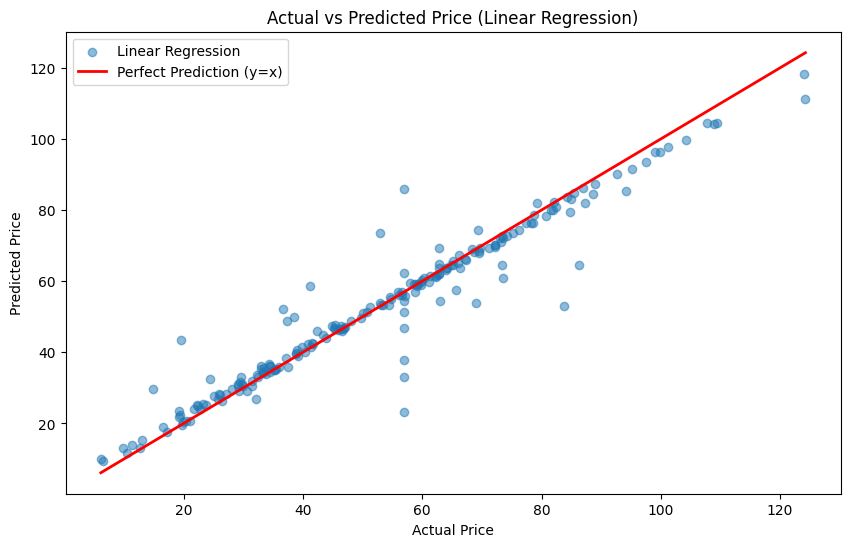

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, my_y_pred, alpha=0.5, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction (y=x)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Linear Regression)')
plt.legend()
plt.show()

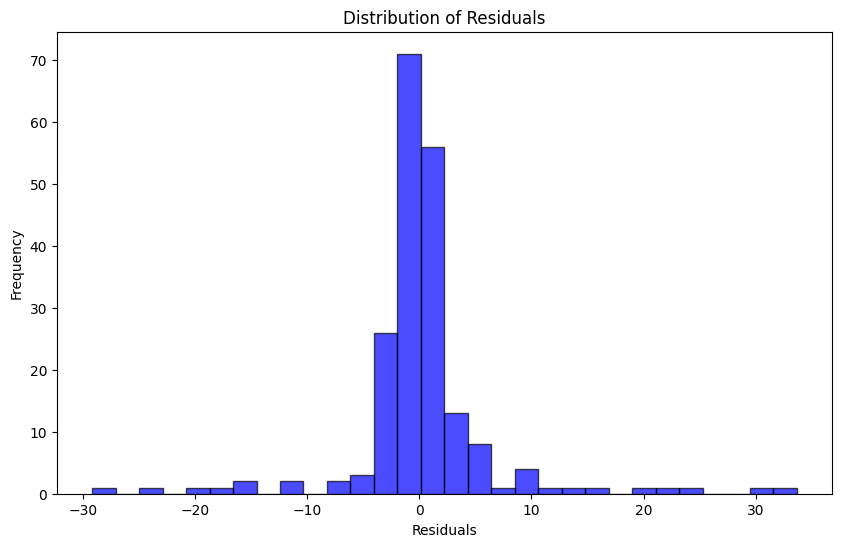

In [16]:
y_pred = my_y_pred.flatten()
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

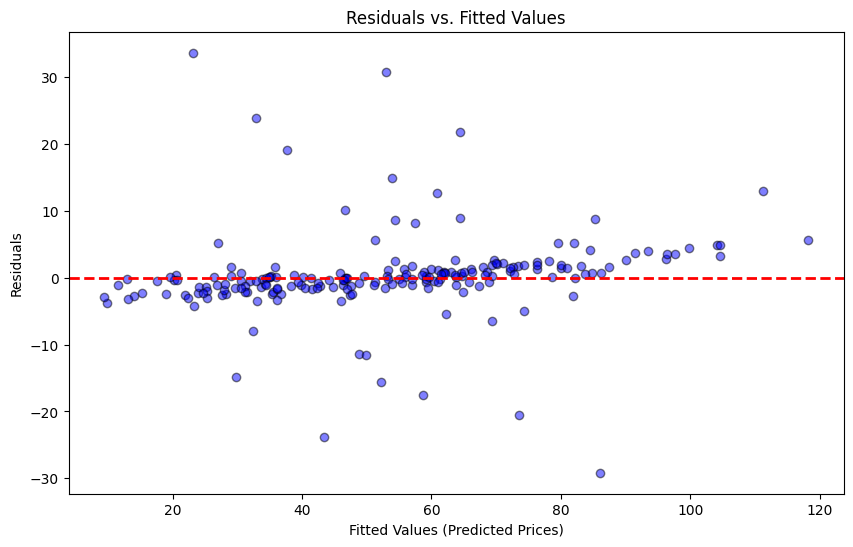

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [22]:
# Extract coefficients as feature importance
importances = abs(mylr.coef_)
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [19]:
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

NameError: name 'feature_importance_df' is not defined

<Figure size 1200x600 with 0 Axes>